In [289]:
## Machine Learning Online Class
#  Exercise 6 | Support Vector Machines
#
#  Instructions
#  ------------
# 
#  This file contains code that helps you get started on the
#  exercise. You will need to complete the following functions:
#
#     gaussianKernel.m
#     dataset3Params.m
#     processEmail.m
#     emailFeatures.m
#
#  For this exercise, you will not need to change any code in this file,
#  or any other files other than those mentioned above.
#

import numpy as np
import matplotlib.pyplot as plt
import scipy.io as scio
import sys
sys.path.append(r"..")
import lib.plotting as libplt

# 1. 加载和可视化数据

Loading and Visualizing Data ...



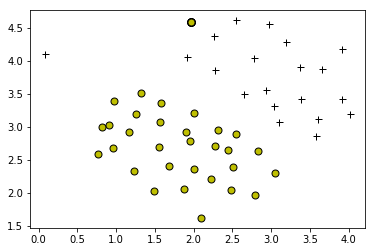

In [292]:
## =============== Part 1: Loading and Visualizing Data ================
#  We start the exercise by first loading and visualizing the dataset. 
#  The following code will load the dataset into your environment and plot
#  the data.
#

print('Loading and Visualizing Data ...\n')

# Load from ex6data1: 
# You will have X, y in your environment
data = scio.loadmat('ex6data1.mat');
X = data['X']
y = data['y']


# Plot training data
libplt.plotData(X, y)
plt.show()

为什么图上还有个离群的negative点？实际数据该点是positive点

# 2. 训练线性SVM

In [293]:
from matplotlib.colors import ListedColormap
def visualizeBoundaryLinear(X, y, model):
    #   VISUALIZEBOUNDARYLINEAR(X, y, model) plots a linear decision boundary 
    #   learned by the SVM and overlays the data on it

    # here reference the plotting example of Machine Learning course of udemy

    X1, X2 = np.meshgrid(np.arange(start = X[:, 0].min() - 1, stop = X[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X[:, 1].min() - 1, stop = X[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 #alpha = 0.75, cmap = ListedColormap(('red', 'green')))
                 alpha = 0.75)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y)):
        plt.scatter(X[np.where(y==j), 0], X[np.where(y == j), 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title('SVM (Training set)')
    plt.legend()
    plt.show()


Training Linear SVM ...



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


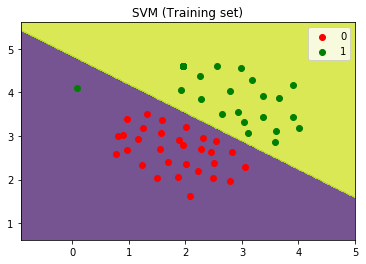

In [294]:
## ==================== Part 2: Training Linear SVM ====================
#  The following code will train a linear SVM on the dataset and plot the
#  decision boundary learned.
from sklearn.svm import SVC

print('\nTraining Linear SVM ...\n')

# You should try to change the C value below and see how the decision
# boundary varies (e.g., try C = 1000)
C = 1;
model = SVC(C,kernel = 'linear', tol = 1e-3, max_iter=20)
model.fit(X,y.ravel())# a 1d array was expected for y

visualizeBoundaryLinear(X, y, model)

不做特征缩放时会得到warning: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
先忽略warning看看结果

做特征缩放试试


Training Linear SVM ...



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


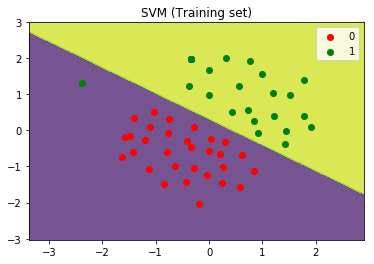

In [295]:
print('\nTraining Linear SVM ...\n')

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X)


# You should try to change the C value below and see how the decision
# boundary varies (e.g., try C = 1000)
C = 1;
model = SVC(C,kernel = 'linear', tol = 1e-3, max_iter=20)
model.fit(X_train,y.ravel())# a 1d array was expected for y

visualizeBoundaryLinear(X_train, y, model)


Training Linear SVM ...



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


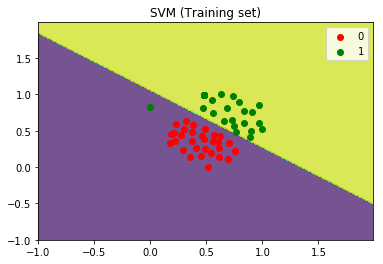

In [296]:
print('\nTraining Linear SVM ...\n')

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X)


# You should try to change the C value below and see how the decision
# boundary varies (e.g., try C = 1000)
C = 1;
model = SVC(C,kernel = 'linear', tol = 1e-3, max_iter=20)
model.fit(X_train,y.ravel())# a 1d array was expected for y

visualizeBoundaryLinear(X_train, y, model)

仍然报warning?
换linearSVC类试试


Training Linear SVM ...



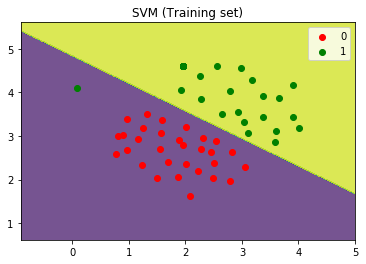

In [297]:
from sklearn.svm import LinearSVC

print('\nTraining Linear SVM ...\n')

# You should try to change the C value below and see how the decision
# boundary varies (e.g., try C = 1000)
C = 1;
model_1 = LinearSVC(C=C,tol = 1e-3, max_iter=20,random_state=2) #如果不加random_state参数，每次运行结果不一样
model_1.fit(X,y.ravel())# a 1d array was expected for y

visualizeBoundaryLinear(X, y, model_1)

没有warning

使用类似作业中MATLAB程序的实现

In [298]:
def visualizeBoundaryLinear2(X, y, model):

    #   VISUALIZEBOUNDARYLINEAR(X, y, model) plots a linear decision boundary 
    #   learned by the SVM and overlays the data on it

    w = model.coef_.ravel()
    b = model.intercept_
    print(w)
    print(b)
    xp = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 100)
    yp = - (w[0]*xp + b)/w[1];
    libplt.plotData(X, y);
    
    plt.plot(xp, yp, '-b'); 
    plt.show()



Training Linear SVM ...

[ 0.41605741  0.65770736]
[-3.18274889]


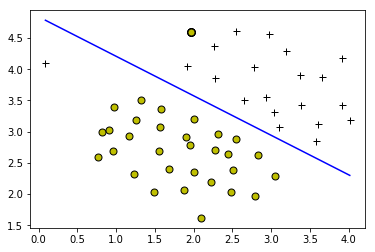

In [299]:
from sklearn.svm import LinearSVC

print('\nTraining Linear SVM ...\n')

# You should try to change the C value below and see how the decision
# boundary varies (e.g., try C = 1000)
C = 1;
model_1 = LinearSVC(C=C,tol = 1e-3, max_iter=20, random_state=2)#如果不加random_state参数，每次运行结果不一样
model_1.fit(X,y.ravel())# a 1d array was expected for y

visualizeBoundaryLinear2(X, y, model_1)

[ 0.46848434  0.8308038 ]
[-3.82749106]


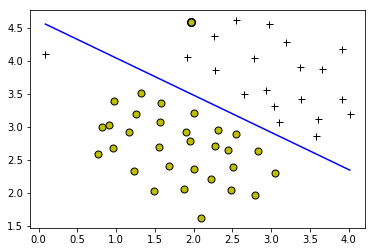

In [300]:
# set C to 100
C = 1000;
model_1 = LinearSVC(C=C,tol = 1e-3, max_iter=20, random_state=2)#如果不加random_state参数，每次运行结果不一样
model_1.fit(X,y.ravel())# a 1d array was expected for y

visualizeBoundaryLinear2(X, y, model_1)

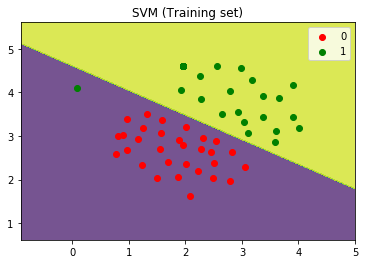

In [301]:
C = 100;
model_1 = LinearSVC(C=C,tol = 1e-3, max_iter=20,random_state=2) #如果不加random_state参数，每次运行结果不一样
model_1.fit(X,y.ravel())# a 1d array was expected for y

visualizeBoundaryLinear(X, y, model_1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


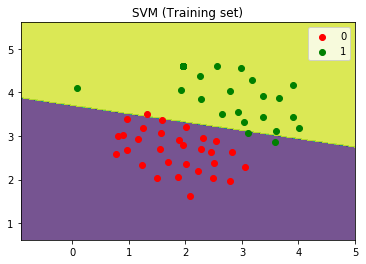

In [302]:
# set C to 100
C = 100;
model = SVC(C,kernel = 'linear', tol = 1e-3, max_iter=20)
model.fit(X,y.ravel())# a 1d array was expected for y

visualizeBoundaryLinear(X, y, model)

sklearn.svm.SVC分类器：不做feature scaling会报warning(做了也没用？)。不加random_state参数每次分类结果也是一样的？增加C值能看出过拟合倾向

sklearn.svm.LinearSVC分类器，不做feature scaling不会报warning，但是必须加random_state参数，否则每次分类结果不一致且有较大误差；增加C值看不出过拟合倾向？

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[ 0.71659853  3.75157839]
[-13.88827839]


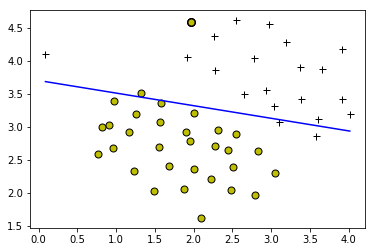

In [303]:
# set C to 100
C = 100;
#model = svmTrain(X, y, C, @linearKernel, 1e-3, 20);
model = SVC(C,kernel = 'linear', tol = 1e-3, max_iter=20)
model.fit(X,y.ravel())# a 1d array was expected for y

visualizeBoundaryLinear2(X, y, model)

# 3. 实现高斯核函数

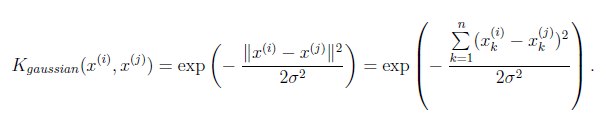

In [304]:
def gaussianKernel(x1, x2, sigma):
    #RBFKERNEL returns a radial basis function kernel between x1 and x2
    #   sim = gaussianKernel(x1, x2) returns a gaussian kernel between x1 and x2
    #   and returns the value in sim

    # Ensure that x1 and x2 are column vectors
    x1 = np.array(x1).reshape(-1,1); x2 = np.array(x2).reshape(-1,1)

    # You need to return the following variables correctly.
    sim = 0;

    # ====================== YOUR CODE HERE ======================
    # Instructions: Fill in this function to return the similarity between x1
    #               and x2 computed using a Gaussian kernel with bandwidth
    #               sigma
    #
    #
    sim = np.exp(-0.5*np.square(np.linalg.norm(x1-x2))/sigma**2)
    return sim

In [305]:
gaussianKernel(np.array([1, 2, 3]), np.array([2, 4, 6]), 3) # expect value:0.45943

0.45942582403592663

In [306]:
## =============== Part 3: Implementing Gaussian Kernel ===============
#  You will now implement the Gaussian kernel to use
#  with the SVM. You should complete the code in gaussianKernel.m
#
print('\nEvaluating the Gaussian Kernel ...\n')

x1 = np.array([1, 2, 1]); x2 = np.array([0, 4, -1]); sigma = 2;
sim = gaussianKernel(x1, x2, sigma);

print('Gaussian Kernel between x1 = [1; 2; 1], x2 = [0; 4; -1], sigma = %f :' \
         '\n\t%f\n(for sigma = 2, this value should be about 0.324652)\n'%(sigma, sim));


Evaluating the Gaussian Kernel ...

Gaussian Kernel between x1 = [1; 2; 1], x2 = [0; 4; -1], sigma = 2.000000 :
	0.324652
(for sigma = 2, this value should be about 0.324652)



# 4. 可视化数据集2

Loading and Visualizing Data ...



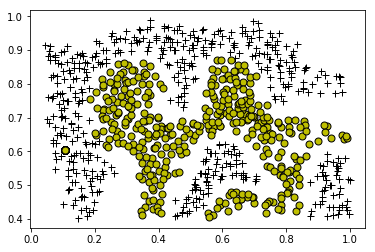

In [307]:
## =============== Part 4: Visualizing Dataset 2 ================
#  The following code will load the next dataset into your environment and 
#  plot the data. 
#

print('Loading and Visualizing Data ...\n')

# Load from ex6data2: 
# You will have X, y in your environment
data2 = scio.loadmat('ex6data2.mat');
X = data2['X']
y = data2['y']

# Plot training data
libplt.plotData(X, y);
plt.show()

# 5. 用高斯核函数训练SVM

RBF核函数就是高斯核函数？
所谓径向基函数 (Radial Basis Function 简称 RBF), 就是某种沿径向对称的标量函数。 通常定义为空间中任一点x到某一中心xc之间欧氏距离的单调函数 , 可记作 k(||x-xc||), 其作用往往是局部的 , 即当x远离xc时函数取值很小。最常用的径向基函数是高斯核函数 ,形式为 k(||x-xc||)=exp{- ||x-xc||^2/(2*σ^2) } 其中xc为核函数中心,σ为函数的宽度参数 , 控制了函数的径向作用范围。
#@ToDo: sklearn里使用自定义核函数训练SVC

In [308]:
#def visualizeBoundary(X, y, model, varargin): # varargin not used
def visualizeBoundary(X, y, model):
    #VISUALIZEBOUNDARY plots a non-linear decision boundary learned by the SVM
    #   VISUALIZEBOUNDARYLINEAR(X, y, model) plots a non-linear decision 
    #   boundary learned by the SVM and overlays the data on it

    # Plot the training data on top of the boundary
    libplt.plotData(X, y)

    # Make classification predictions over a grid of values
    x1plot = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 100).reshape(-1,1) # column vector
    x2plot = np.linspace(np.min(X[:,1]), np.max(X[:,1]), 100).reshape(-1,1)
    X1, X2 = np.meshgrid(x1plot, x2plot);

    vals = np.zeros(X1.shape)
    for i in range(X1.shape[1]):
       this_X = np.column_stack((X1[:, i], X2[:, i]))
       vals[:, i] = model.predict(this_X)
    

    # Plot the SVM boundary
    
    plt.contour(X1, X2, vals, np.array([-0.5,0.5]), colors='b'); # 第三个参数使用[0,1]时结果与使用[-0.5,0.5]时差别不大，
                                                    # 但会报warning: No contour levels were found within the data range.

    plt.show()


Training SVM with Gaussian Kernel (this may take 1 to 2 minutes) ...



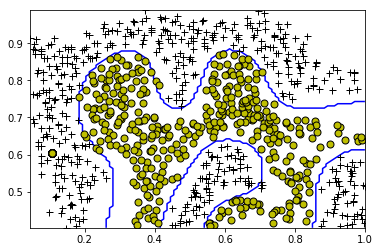

In [309]:
## ========== Part 5: Training SVM with RBF Kernel (Dataset 2) ==========
#  After you have implemented the kernel, we can now use it to train the 
#  SVM classifier.
# 
print('\nTraining SVM with Gaussian Kernel (this may take 1 to 2 minutes) ...\n');

# Load from ex6data2: 
# You will have X, y in your environment


# SVM Parameters
C = 1; 
#sigma = 0.1; #there's no sigma parameter in SVC, gamma is used instead
gamma = 50 #in specification of SVC, gamma = 0.5/sigma^2

# We set the tolerance and max_passes lower here so that the code will run
# faster. However, in practice, you will want to run the training to
# convergence.
#model= svmTrain(X, y, C, @(x1, x2) gaussianKernel(x1, x2, sigma)); 
model= SVC(C, kernel = 'rbf', gamma = gamma); 
model.fit(X,y.ravel())
visualizeBoundary(X, y, model);

# 6. 可视化数据集3

Loading and Visualizing Data ...



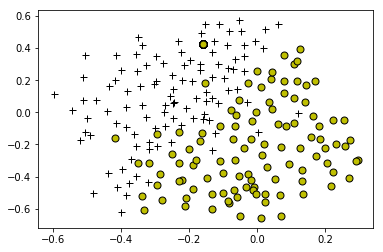

In [310]:
## =============== Part 6: Visualizing Dataset 3 ================
#  The following code will load the next dataset into your environment and 
#  plot the data. 
#

print('Loading and Visualizing Data ...\n')

# Load from ex6data3: 
# You will have X, y in your environment
data3 = scio.loadmat('ex6data3.mat');
X = data3['X']
y = data3['y']
Xval = data3['Xval']
yval = data3['yval']

# Plot training data
libplt.plotData(X, y);
plt.show()


# 7. 使用高斯核函数训练SVM

使用作业中提示的准确率衡量，会得到过拟合的结果

In [311]:
def dataset3Params_1(X, y, Xval, yval):
    #DATASET3PARAMS returns your choice of C and sigma for Part 3 of the exercise
    #where you select the optimal (C, sigma) learning parameters to use for SVM
    #with RBF kernel
    #   [C, sigma] = DATASET3PARAMS(X, y, Xval, yval) returns your choice of C and 
    #   sigma. You should complete this function to return the optimal C and 
    #   sigma based on a cross-validation set.
    #

    # You need to return the following variables correctly.
    '''C = 1;
    sigma = 0.3;'''

    # ====================== YOUR CODE HERE ======================
    # Instructions: Fill in this function to return the optimal C and sigma
    #               learning parameters found using the cross validation set.
    #               You can use svmPredict to predict the labels on the cross
    #               validation set. For example, 
    #                   predictions = svmPredict(model, Xval);
    #               will return the predictions on the cross validation set.
    #
    #  Note: You can compute the prediction error using 
    #        mean(double(predictions ~= yval))
    val_list = [0.01, 0.03, 0.1,0.3, 1, 3, 10, 30,100]
    combination_list = [(C,sigma) for C in val_list for sigma in val_list]
    
    result = []
    
    for C,sigma in combination_list:
        gamma = 0.5/sigma**2
        model = SVC(C, kernel = 'rbf', gamma = gamma)
        model.fit(X,y.ravel())
        y_predict = model.predict(Xval)
        
        accuracy = np.mean(np.double(y_predict==yval))
        result.append(accuracy)
     
        
    best_score = result[np.argmax(result)]
    print("Best accuracy: %f"%best_score)
    best_param = combination_list[np.argmax(result)]
    print("Best parameter: C=%f,sigma=%f"%(best_param[0],best_param[1]))
    return best_param

Best accuracy: 0.514300
Best parameter: C=1.000000,sigma=0.030000


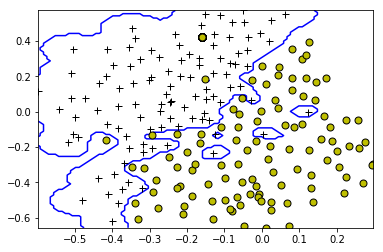

In [312]:
## ========== Part 7: Training SVM with RBF Kernel (Dataset 3) ==========

#  This is a different dataset that you can use to experiment with. Try
#  different values of C and sigma here.
# 

# Try different SVM Parameters here
C, sigma = dataset3Params_1(X, y, Xval, yval);

# Train the SVM
model = SVC(C, kernel='rbf', gamma = 0.5/sigma**2)
model.fit(X, y.ravel())
visualizeBoundary(X, y, model);

使用sklearn库的score函数

In [314]:
def dataset3Params(X, y, Xval, yval):
    #DATASET3PARAMS returns your choice of C and sigma for Part 3 of the exercise
    #where you select the optimal (C, sigma) learning parameters to use for SVM
    #with RBF kernel
    #   [C, sigma] = DATASET3PARAMS(X, y, Xval, yval) returns your choice of C and 
    #   sigma. You should complete this function to return the optimal C and 
    #   sigma based on a cross-validation set.
    #

    # You need to return the following variables correctly.
    '''C = 1;
    sigma = 0.3;'''

    # ====================== YOUR CODE HERE ======================
    # Instructions: Fill in this function to return the optimal C and sigma
    #               learning parameters found using the cross validation set.
    #               You can use svmPredict to predict the labels on the cross
    #               validation set. For example, 
    #                   predictions = svmPredict(model, Xval);
    #               will return the predictions on the cross validation set.
    #
    #  Note: You can compute the prediction error using 
    #        mean(double(predictions ~= yval))
    val_list = [0.01, 0.03, 0.1,0.3, 1, 3, 10, 30,100]
    combination_list = [(C,sigma) for C in val_list for sigma in val_list]
    
    result = []
    
    for C,sigma in combination_list:
        gamma = 0.5/sigma**2
        model = SVC(C, kernel = 'rbf', gamma = gamma)
        model.fit(X,y.ravel())
        
        #使用sklearn库的score
        result.append(model.score(Xval,yval))
        
        
    best_score = result[np.argmax(result)]
    print("Best score: %f"%best_score)
    best_param = combination_list[np.argmax(result)]
    print("Best parameter: C=%f,sigma=%f"%(best_param[0],best_param[1]))
    return best_param

Best score: 0.965000
Best parameter: C=1.000000,sigma=0.100000


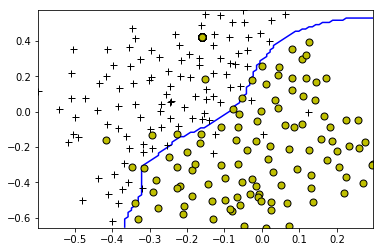

In [315]:
C, sigma = dataset3Params(X, y, Xval, yval);

# Train the SVM
model = SVC(C, kernel='rbf', gamma = 0.5/sigma**2)
model.fit(X, y.ravel())
visualizeBoundary(X, y, model);